# MELODI Presto Use Cases

In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns
import networkx as nx
import operator 

from networkx.drawing.nx_pydot import graphviz_layout
from utils import enrich, overlap, sentence, API_URL, plot_overlap_counts, create_overlap_network


## Configure parameters

In [2]:
requests.get(f"{API_URL}/status").json()

True

# Run the overlap function on some examples

### Genetic basis of psoriasis

https://www.cell.com/ajhg/fulltext/S0002-9297(12)00157-7

In [3]:
q1=['AP1S3','IL36RN','CARD14']
q2=['Psoriasis','Eczema']

overlap_df = overlap(q1,q2)

AP1S3 Psoriasis (0, 32)
AP1S3 Eczema (0, 32)
IL36RN Psoriasis (38, 32)
IL36RN Eczema (0, 32)
CARD14 Psoriasis (40, 32)
CARD14 Eczema (9, 32)


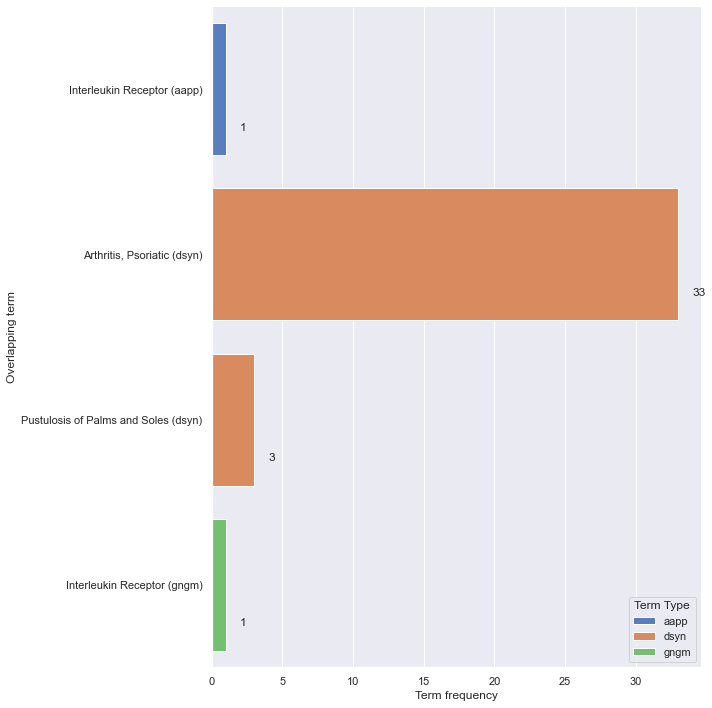

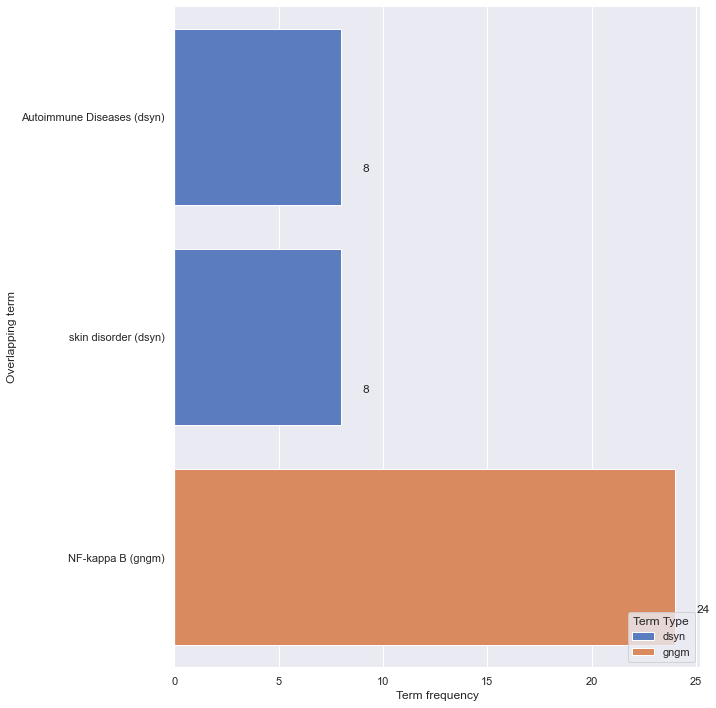

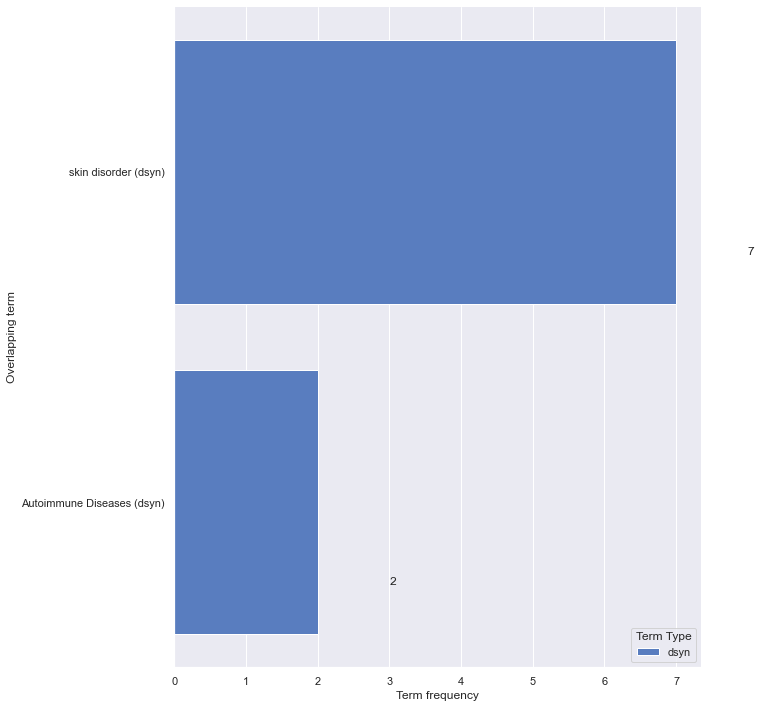

In [4]:
#ignore overlaps containing any of the query terms
overlap_df = overlap_df[~overlap_df['object_name_x'].str.lower().isin([x.lower() for x in q1+q2])]

for i in q1:
    for j in q2:
        overlap_counts = overlap_df[(overlap_df.set_x==i.lower()) & (overlap_df.set_y==j.lower())]
        print(i,j,overlap_counts.shape)
        if not overlap_counts.empty:
            overlap_counts = overlap_counts.groupby(['object_type_x'])['object_name_x'].value_counts()
            #print(overlap_counts)
            plt=plot_overlap_counts(overlap_counts)

### Drug repurposing

https://www.medrxiv.org/content/10.1101/2020.05.07.20093286v1

In [2]:
q1=['DHODH', 'ITGB5', 'JAK2']
q2=['Leflunomide','Cilengitide','Baricitinib']

overlap_df = overlap(q1,q2)
print(overlap_df.head())
overlap_df = overlap_df[~overlap_df['object_name_x'].str.lower().isin([x.lower() for x in q1+q2])]

                                            triple_x  \
0  Dihydroorotate dehydrogenase:INTERACTS_WITH:Py...   
1  Dihydroorotate dehydrogenase:INTERACTS_WITH:Py...   
2  Dihydroorotate dehydrogenase:COEXISTS_WITH:Pyr...   
3  Dihydroorotate dehydrogenase:COEXISTS_WITH:Pyr...   
4                   Enzymes:COEXISTS_WITH:Pyrimidine   

                 subject_name_x subject_type_x subject_id_x     predicate_x  \
0  Dihydroorotate dehydrogenase           aapp     C0058099  INTERACTS_WITH   
1  Dihydroorotate dehydrogenase           aapp     C0058099  INTERACTS_WITH   
2  Dihydroorotate dehydrogenase           aapp     C0058099   COEXISTS_WITH   
3  Dihydroorotate dehydrogenase           aapp     C0058099   COEXISTS_WITH   
4                       Enzymes           enzy     C0014442   COEXISTS_WITH   

  object_name_x object_type_x object_id_x  localCount_x  localTotal_x  ...  \
0    Pyrimidine          orch    C0034284            19           351  ...   
1    Pyrimidine          orch   

In [4]:
overlap_counts = overlap_df.groupby(['set_x','set_y','object_type_x'])['object_name_x'].value_counts()
overlap_counts

set_x  set_y        object_type_x  object_name_x                     
dhodh  leflunomide  aapp           Dihydroorotate dehydrogenase|DHODH     1
                    dsyn           Rheumatoid Arthritis                  18
                    gngm           Dihydroorotate dehydrogenase          50
                                   Dihydroorotate dehydrogenase|DHODH     1
                                   Phosphotransferases                    1
                    orch           Pyrimidine                            12
jak2   baricitinib  aapp           Janus kinase                           5
                                   Janus kinase 1|JAK1                    4
                                   cytokine                               3
                                   TNF protein, human|TNF                 1
                    gngm           Janus kinase                          10
                                   Janus kinase 1|JAK1                    4
                  


betweeness
 [('JAK2', 0.5289848655298094), ('LEFLUNOMIDE', 0.16296746013038155), ('Rheumatoid\nArthritis', 0.15866088793991429), ('Hydrogen\nPeroxide', 0.1097261952224499), ('Dihydroorotate\ndehydrogenase', 0.10826707901614273), ('Janus\nkinase', 0.10292179730381977), ('small\nmolecule', 0.08672871032421596), ('Phosphotransferases', 0.07421672861747763), ('DHODH', 0.07052857601546736), ('A\n771726', 0.05970893581380472)]

pagerank
 [('JAK2', 0.10788692790885866), ('LEFLUNOMIDE', 0.0422733678619398), ('DHODH', 0.03945349927434845), ('Janus\nkinase', 0.036664233735060676), ('Phosphotransferases', 0.03629517347203187), ('Rheumatoid\nArthritis', 0.034928022723577465), ('Dihydroorotate\ndehydrogenase', 0.02883544967895903), ('Leptin|LEP', 0.023863001750458183), ('Janus\nkinase\n2|JAK2', 0.021949687089099126), ('Janus\nkinase\n1|JAK1', 0.021789330628892448)]


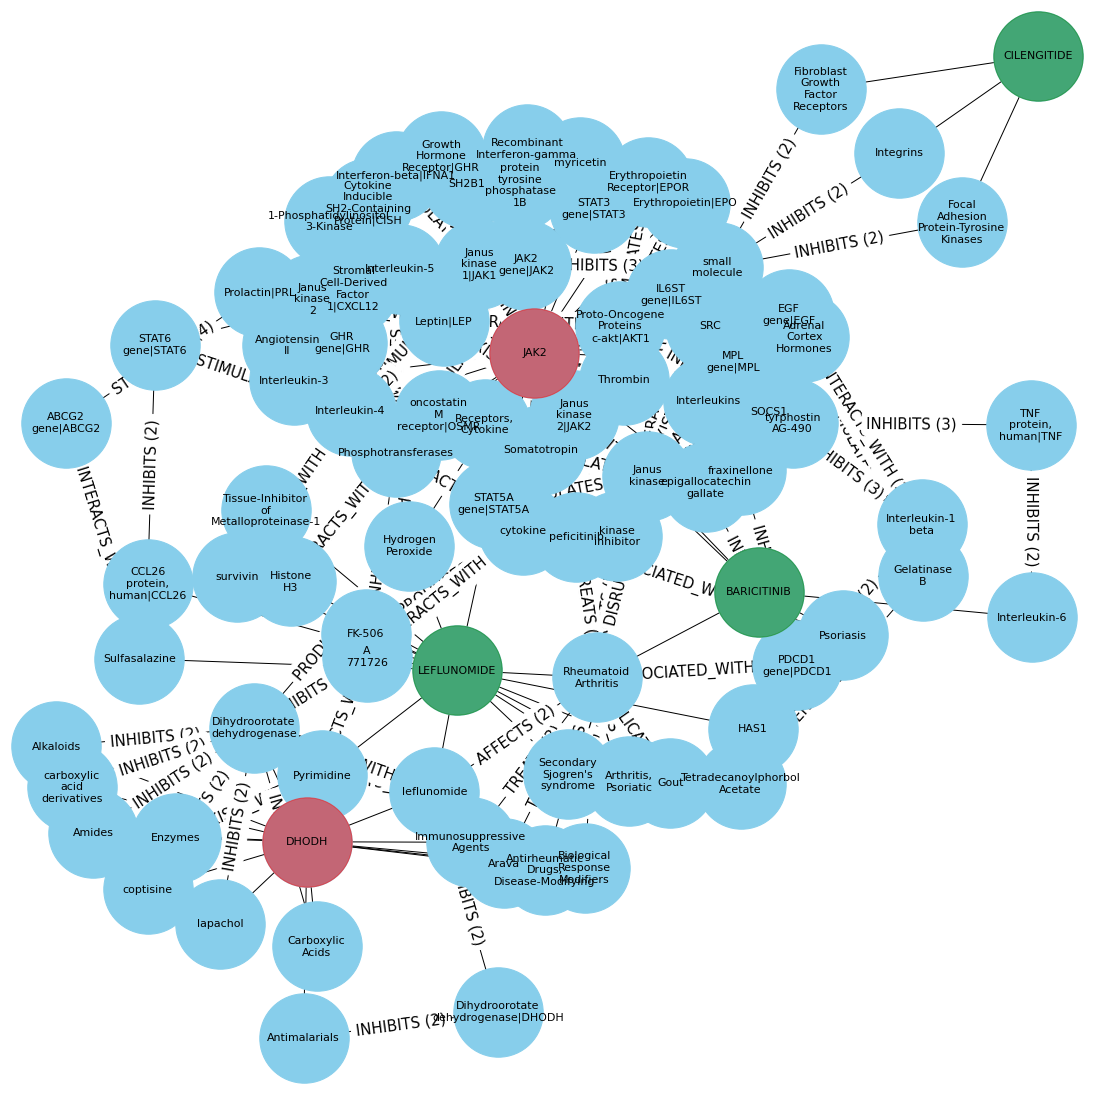

In [11]:
plt,G = create_overlap_network(overlap_df)

#betweeness
b=nx.betweenness_centrality(G)
sorted_b = sorted(b.items(), key=operator.itemgetter(1),reverse=True)
print('\nbetweeness\n',sorted_b[:10])

#pagerank
pr=nx.pagerank(G)
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
print('\npagerank\n',sorted_pr[:10])

### Obesity and thyroid cancer

https://academic.oup.com/jcem/article/105/7/dgaa250/5835841

object_type_x  object_name_x                     
aapp           ghrelin                               10
               Proto-Oncogene Proteins c-akt|AKT1     4
               PPAR gamma                             3
               Sex Hormone-Binding Globulin           3
               Corticotropin-Releasing Hormone        1
               FRAP1 protein, human|MTOR              1
               Somatostatin                           1
dsyn           Syndrome                              28
               Crohn's disease                        3
               Hypothyroidism                         2
               Thrombophilia                          2
               Thrombus                               1
gngm           PPAR gamma                             6
               Proto-Oncogene Proteins c-akt|AKT1     4
               ghrelin                                3
               MAPKAP1                                1
               Phosphotransferases                    

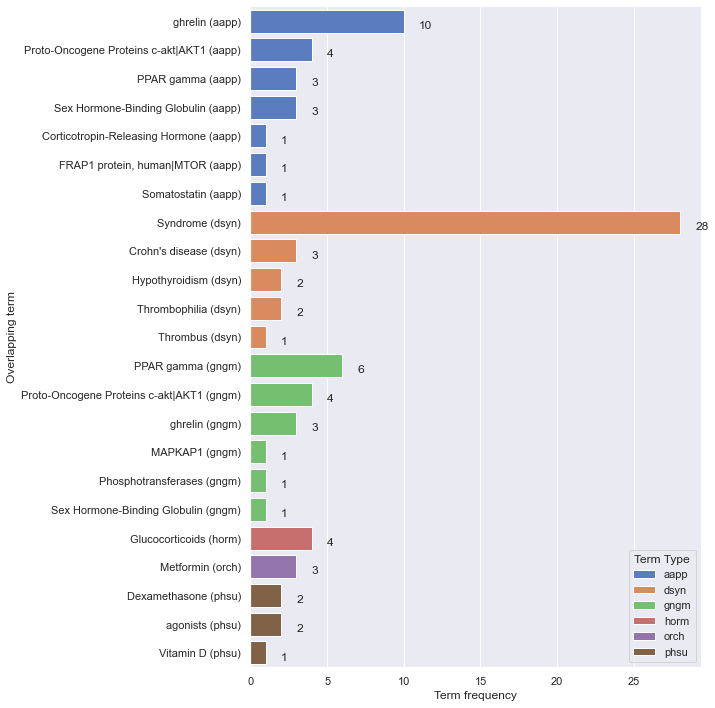

In [5]:
q1=['obesity']
q2=['thyroid cancer']

overlap_df = overlap(q1,q2)
overlap_df = overlap_df[~overlap_df['object_name_x'].str.lower().isin([x.lower() for x in q1+q2])]
overlap_counts = overlap_df.groupby(['object_type_x'])['object_name_x'].value_counts()
print(overlap_counts)
plt=plot_overlap_counts(overlap_counts)

### Coronavirus and dexamethasone

Recent work (https://www.recoverytrial.net/) has demonstrated a potential beneficial effect of dexamethasone on covid-19. Here we can explore the potential intermediates connecting them, including genes, diseases and hormones. We can also separate the two terms `coronavirus` and `covid-19` to distinguish which semantic terms are associated with each query. 

In [ ]:
q1=['dexamethasone']
q2=['coronavirus or covid-19']

overlap_df = overlap(q1,q2)
overlap_df = overlap_df[~overlap_df['object_name_x'].str.lower().isin([x.lower() for x in q1+q2])]
overlap_counts = overlap_df.groupby(['object_type_x'])['object_name_x'].value_counts()
print(overlap_counts)

plt=plot_overlap_counts(overlap_counts)
plt.savefig('overlaps.png',dpi=1000)


object_type_x  object_name_x                            
aapp           TNF protein, human|TNF                         9
               cytokine                                       8
               TGFB1 protein, human|TGFB1                     3
               human leukocyte interferon|IFNA1               3
               Pulmonary Surfactant-Associated Protein A      2
               Recombinant Interferon-gamma                   2
               Tumor Necrosis Factor-alpha|TNF                2
               Pulmonary Surfactant-Associated Protein D      1
               chemokine                                      1
dsyn           Infection                                     55
               Pneumonia                                     30
               Hypertensive disease                          24
               Bronchiolitis                                  8
               Virus Diseases                                 8
               Obesity                         

In [6]:
plt,G = create_overlap_network(overlap_df)

#betweeness
b=nx.betweenness_centrality(G)
sorted_b = sorted(b.items(), key=operator.itemgetter(1),reverse=True)
print('\nbetweeness\n',sorted_b[:10])

#pagerank
pr=nx.pagerank(G)
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
print('\npagerank\n',sorted_pr[:10])

NameError: name 'nx' is not defined

<Figure size 1080x1080 with 0 Axes>

# Identifying risk factors for a disease

We can explore one disease in detail to identify risk factors. In this case, `asthma`.

In [53]:
q='asthma'
enrich_df=enrich(q)

#map to objects that contain the query term
enrich_df = enrich_df[enrich_df['object_name'].str.contains(q,case=False)]
#print(enrich_df)
print(enrich_df.shape)

#list of risk factor predicates
rf_preds=['CAUSES','PREDISPOSES','PRECEDES','STIMULATES']
rf=enrich_df[enrich_df['predicate'].isin(rf_preds)]

#make sure pval is a float
rf['pval']=rf['pval'].astype(float)

#look at the top 20 ordered by enrichment pvalue
rf.sort_values(by='pval',ascending=True).head(20)[['subject_name','subject_type','predicate','object_name','pval','localCount']]

(3161, 16)


/Users/be15516/anaconda3/envs/MelodiPresto/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,subject_name,subject_type,predicate,object_name,pval,localCount
1,Ovalbumin,aapp,CAUSES,Asthma,0.000000e+00,686
6,Tolylene Diisocyanate,hops,CAUSES,Asthma,0.000000e+00,299
10,Obesity,dsyn,PREDISPOSES,Asthma,2.231166e-269,194
13,Ovalbumin,aapp,CAUSES,Extrinsic asthma NOS,9.277513e-231,166
20,Irritants,hops,CAUSES,Asthma,1.240808e-165,119
22,Isocyanates,orch,CAUSES,Asthma,7.125863e-163,117
31,Isocyanates,orch,CAUSES,Occupational asthma,1.792807e-142,102
38,Tolylene Diisocyanate,hops,CAUSES,Occupational asthma,1.557261e-124,89
44,Allergic rhinitis NOS,dsyn,PREDISPOSES,Asthma,5.684155e-108,77
48,cytokine,aapp,CAUSES,Asthma,2.969208e-95,68


# All against all

The excellent performance capabilities of MELODI Presto means we can perform an all-against-all analysis for a range of terms, e.g. a list of genes and diseases. This can create a network, highlighting potential shared mechanisms of action. 

As an example we examine the relationships between 

In [17]:
#just run enrich on each then create network